In [6]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm
from pathlib import Path
import numpy as np

from hloc import (
    extract_features,
    match_features,
    reconstruction,
    match_dense,
    visualization,
    pairs_from_exhaustive,
)
from hloc.visualization import plot_images, read_image
from hloc.utils import viz_3d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
images = Path("data/image-matching-challenge-2025/test/ETs")
outputs = Path("outputs/demo/")
!rm -rf $outputs
sfm_pairs = outputs / "pairs-sfm.txt"
loc_pairs = outputs / "pairs-loc.txt"
sfm_dir = outputs / "sfm"
features = outputs / "features.h5"
matches = outputs / "matches.h5"

feature_conf = extract_features.confs["disk"]
matcher_conf = match_dense.confs["loftr"]

outliers_out_et001.png
another_et_another_et008.png
another_et_another_et004.png
another_et_another_et010.png
et_et004.png
another_et_another_et001.png
outliers_out_et002.png
et_et006.png
et_et003.png
another_et_another_et003.png
et_et005.png
et_et000.png
outliers_out_et003.png
another_et_another_et005.png
et_et001.png
another_et_another_et009.png
et_et007.png
another_et_another_et007.png
et_et002.png
et_et008.png
another_et_another_et002.png
another_et_another_et006.png
22 mapping images


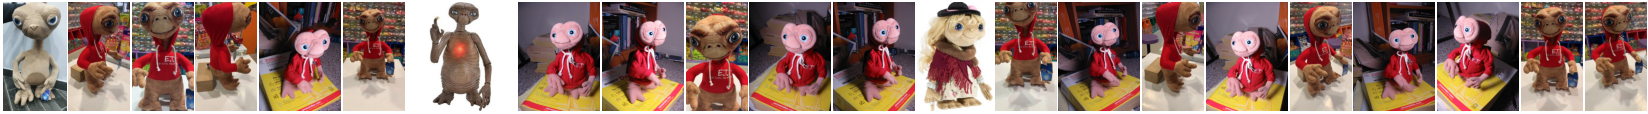

In [4]:
references = [p.relative_to(images).as_posix() for p in images.glob("*.png")]

for r in references:
    print(r)

print(len(references), "mapping images")
plot_images([read_image(images / r) for r in references], dpi=25)

In [7]:
extract_features.main(
    feature_conf, images, image_list=references, feature_path=features
)
pairs_from_exhaustive.main(sfm_pairs, image_list=references)
features, matches = match_dense.main(matcher_conf, sfm_pairs, images, outputs, max_kps=8192, overwrite=False)
print(matches)

[2025/04/28 22:56:40 hloc INFO] Extracting local features with configuration:
{'model': {'max_keypoints': 5000, 'name': 'disk'},
 'output': 'feats-disk',
 'preprocessing': {'grayscale': False, 'resize_max': 1600}}
100%|██████████| 22/22 [00:00<00:00, 24.31it/s]
[2025/04/28 22:56:41 hloc INFO] Finished exporting features.
[2025/04/28 22:56:41 hloc INFO] Found 231 pairs.
[2025/04/28 22:56:41 hloc INFO] Extracting semi-dense features with configuration:
{'cell_size': 1,
 'max_error': 1,
 'model': {'name': 'loftr', 'weights': 'outdoor'},
 'output': 'matches-loftr',
 'preprocessing': {'dfactor': 8, 'grayscale': True, 'resize_max': 1024}}


ImportError: cannot import name 'LoFTR' from 'networks.loftr' (/home/wqq/IMC2025/networks/loftr/__init__.py)

In [23]:
mapper_options = {"min_model_size" : 2, "max_num_models": 25}
## TODO min_match_score do has an big impact on the number of points
model, _ = reconstruction.main(
    sfm_dir, images, sfm_pairs, features, matches, image_list=references, min_match_score=0.2, mapper_options =mapper_options
)
print(model.images)
fig = viz_3d.init_figure()
viz_3d.plot_reconstruction(
    fig, model, color="rgba(255,0,0,0.5)", name="mapping", points_rgb=True
)
fig.show()

[2025/04/28 21:24:55 hloc INFO] Creating an empty database...
[2025/04/28 21:24:55 hloc INFO] Importing images into the database...
[2025/04/28 21:24:55 hloc INFO] Importing features into the database...
100%|██████████| 22/22 [00:00<00:00, 2362.02it/s]
[2025/04/28 21:24:55 hloc INFO] Importing matches into the database...
100%|██████████| 231/231 [00:00<00:00, 1757.72it/s]
[2025/04/28 21:24:55 hloc INFO] Performing geometric verification of the matches...
I20250428 21:24:55.700655 135046086243904 misc.cc:44] 
Feature matching
I20250428 21:24:55.700907 135044937016896 sift.cc:1432] Creating SIFT CPU feature matcher
I20250428 21:24:55.700956 135046619252288 sift.cc:1432] Creating SIFT CPU feature matcher
I20250428 21:24:55.700934 135046199502400 sift.cc:1432] Creating SIFT CPU feature matcher
I20250428 21:24:55.701026 135046220478016 sift.cc:1432] Creating SIFT CPU feature matcher
I20250428 21:24:55.701113 135046207895104 sift.cc:1432] Creating SIFT CPU feature matcher
I20250428 21:24:5

MapImageIdToImage{1: Image(image_id=1, camera=Camera(camera_id=1), name="another_et_another_et001.png", has_pose=1, triangulated=4358/8192), 2: Image(image_id=2, camera=Camera(camera_id=2), name="another_et_another_et002.png", has_pose=1, triangulated=3140/4319), 3: Image(image_id=3, camera=Camera(camera_id=3), name="another_et_another_et003.png", has_pose=1, triangulated=3284/6225), 4: Image(image_id=4, camera=Camera(camera_id=4), name="another_et_another_et004.png", has_pose=1, triangulated=4414/8192), 5: Image(image_id=5, camera=Camera(camera_id=5), name="another_et_another_et005.png", has_pose=1, triangulated=3858/6180), 6: Image(image_id=6, camera=Camera(camera_id=6), name="another_et_another_et006.png", has_pose=1, triangulated=1580/2505), 7: Image(image_id=7, camera=Camera(camera_id=7), name="another_et_another_et007.png", has_pose=1, triangulated=2003/4194), 8: Image(image_id=8, camera=Camera(camera_id=8), name="another_et_another_et008.png", has_pose=1, triangulated=345/5304),